In [ ]:
from numpy import array
from sklearn.model_selection import KFold
import pandas as pd

import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.random import default_rng

from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

from keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import tensorflow as tf

import itertools

from hyperopt.pyll.base import scope
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, STATUS_FAIL

In [ ]:
def normal_distribution_data(n_samples,n_classes,cluster):
    colors = ['purple', 'yellow','green']
    vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
    features, true_labels = make_blobs(n_samples=n_samples, n_features=2, centers=n_classes, cluster_std=cluster, random_state=45)
    d = {'x1': features[:,0], 'x2': features[:,1], 'label': true_labels}
    two_cl_data = pd.DataFrame(data=d)
    X_all = two_cl_data[['x1','x2']]
    y_all = two_cl_data['label']
    return(X_all,y_all)


def moon_sahpe(number_of_moons,sigma, radius, number_of_datapoints, y_shift):
    moons = []
    np.random.seed(45)
    for y in range(number_of_moons):
        q = np.random.uniform(0,np.pi,size=number_of_datapoints)
        if y % 2 == 0:
            factor = 1
        else:
            factor = -1
        moon = np.zeros((number_of_datapoints, 3))
        moon[:,0] = (radius * np.cos(q)) + y
        moon[:,1] = (radius * np.sin(q) * factor) + (factor == -1) * y_shift
        moon[:,2] = y
        moons.append(moon)
        noise = np.random.normal(0, sigma, size=moon[:,:2].shape)
        moon[:,:2] += noise
    moons = np.concatenate(moons)
    d = {'x1': moons[:,0], 'x2': moons[:,1], 'label': moons[:,2]}
    data = pd.DataFrame(data=d)
    X_all = data[['x1','x2']]
    y_all = data['label']
    return(X_all,y_all)

def circle_shape(n_samples, factor, noise):
    colors = ['purple', 'yellow','green']
    vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
    features, true_labels = make_circles(n_samples=n_samples, factor=factor, noise=noise,random_state=45)
    d = {'x1': features[:,0], 'x2': features[:,1], 'label': true_labels}
    two_cl_data = pd.DataFrame(data=d)
    X_all = two_cl_data[['x1','x2']]
    y_all = two_cl_data['label']
    return(X_all,y_all)

# Simulated Datasets (Binary Classification) Generation
- Normal distribution dataset
  - Data a (cluster_std=2), Data b (cluster_std=4), Data c (cluster_std=6)
- moon shape dataset
  - Data g (sigma=0.1), Data h (sigma=0.2), Data i (sigma=0.4)
- circle shape dataset  
  - Data m (factor=0.3, noise=0.1), Data n (factor=0.5, noise=0.1), Data o (factor=0.7, noise=0.1)

# Example code of running CDdm with Data o

In [ ]:
# File path
file_name = '(o)two_class_cs.xlsx'

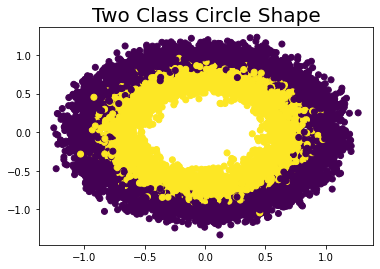

In [ ]:
# Circle shape
two_cs_X,two_cs_y = circle_shape(8000, 0.7, 0.1)
two_cs_X = two_cs_X.to_numpy()
two_cs_y = two_cs_y.to_numpy()
plt.scatter(two_cs_X[:,0], two_cs_X[:,1], c=two_cs_y)
plt.title("Two Class Circle Shape",fontsize=20)
plt.show()

'''
# Normal distribution
two_nd_X,two_nd_y = normal_distribution_data(n_samples=8000,n_classes=2,cluster=6)
'''

'''
# Moon shape
two_ms_X,two_ms_y = moon_shape(number_of_moons=2,sigma=0.1, radius=1, number_of_datapoints=4000,y_shift = 0.3)
'''

## Divide data into five sets

In [ ]:
# Split the data to five groups and save each index in fold_indices
kfold = KFold(n_splits=5, shuffle=True, random_state= 0)

# Save the index of each fold in a list
fold_index = []
for train_index, test_index in kfold.split(two_cs_X):
    fold_index.append((test_index))

In [ ]:
# Order of using folds
fold_order = []
lst = [0,1,2,3,4]
for order in range(len(lst)):
    fold_order.append(lst[order:] + lst[:order])
print(fold_order)
print(fold_order[0])

[[0, 1, 2, 3, 4], [1, 2, 3, 4, 0], [2, 3, 4, 0, 1], [3, 4, 0, 1, 2], [4, 0, 1, 2, 3]]
[0, 1, 2, 3, 4]


In [ ]:
# number of neurons and layer combination for Hyperopt
numbers = [5, 10, 15, 20]
one_combinations_with_order = list(itertools.product(numbers))
two_combinations_with_order = list(itertools.product(numbers, repeat=2))
three_combinations = list(itertools.product(numbers, repeat=3))

layer_neuron_orders = []
layer_neuron_orders = one_combinations_with_order + two_combinations_with_order+three_combinations
print(layer_neuron_orders)

[(5,), (10,), (15,), (20,), (5, 5), (5, 10), (5, 15), (5, 20), (10, 5), (10, 10), (10, 15), (10, 20), (15, 5), (15, 10), (15, 15), (15, 20), (20, 5), (20, 10), (20, 15), (20, 20), (5, 5, 5), (5, 5, 10), (5, 5, 15), (5, 5, 20), (5, 10, 5), (5, 10, 10), (5, 10, 15), (5, 10, 20), (5, 15, 5), (5, 15, 10), (5, 15, 15), (5, 15, 20), (5, 20, 5), (5, 20, 10), (5, 20, 15), (5, 20, 20), (10, 5, 5), (10, 5, 10), (10, 5, 15), (10, 5, 20), (10, 10, 5), (10, 10, 10), (10, 10, 15), (10, 10, 20), (10, 15, 5), (10, 15, 10), (10, 15, 15), (10, 15, 20), (10, 20, 5), (10, 20, 10), (10, 20, 15), (10, 20, 20), (15, 5, 5), (15, 5, 10), (15, 5, 15), (15, 5, 20), (15, 10, 5), (15, 10, 10), (15, 10, 15), (15, 10, 20), (15, 15, 5), (15, 15, 10), (15, 15, 15), (15, 15, 20), (15, 20, 5), (15, 20, 10), (15, 20, 15), (15, 20, 20), (20, 5, 5), (20, 5, 10), (20, 5, 15), (20, 5, 20), (20, 10, 5), (20, 10, 10), (20, 10, 15), (20, 10, 20), (20, 15, 5), (20, 15, 10), (20, 15, 15), (20, 15, 20), (20, 20, 5), (20, 20, 10), 

## Generate two neural networks model

In [ ]:
# Neural networks model A
def create_model_A(params):
    # Create model
    model = tf.keras.models.Sequential()
    # First hidden layer with input shape
    model.add(Dense(params['hidden_layer_sizes'][0], input_shape=(2,), activation=params['activation']))
    for i in range(1,len(params['hidden_layer_sizes'])):
        # from second hidden layer to number of hidden layers
        model.add(Dense(params['hidden_layer_sizes'][i], activation=params['activation']))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=params['learnRate']), metrics=['accuracy'])

    # Ouput layer
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    es = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=50)
    result = model.fit(train_x_model_A, train_y_model_A, verbose=0, validation_split=0.3,
                       batch_size = params['batch_size'], epochs = 500,
                       callbacks=[es])

    validation_loss = np.amin(result.history['val_loss'])
    print('Best validation loss of epoch:', validation_loss)
    return {'loss': validation_loss,
            'status': STATUS_OK,
            'model': model,
            'params': params}


# Neural networks model B
def create_model_B(params):
    # Create model
    model = tf.keras.models.Sequential()
    # First hidden layer with input shape
    model.add(Dense(params['hidden_layer_sizes'][0], input_shape=(2,), activation=params['activation']))
    for i in range(1,len(params['hidden_layer_sizes'])):
        # from second hidden layer to number of hidden layers
        model.add(Dense(params['hidden_layer_sizes'][i], activation=params['activation']))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=params['learnRate']), metrics=['accuracy'])

    # Ouput layer
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    es = EarlyStopping(monitor='val_loss',mode='min', verbose=1, patience=50)
    result = model.fit(model_B_train_x, model_B_train_y, verbose=0, validation_split=0.3,
                       batch_size = params['batch_size'], epochs = 500,
                       callbacks=[es])

    validation_loss = np.amin(result.history['val_loss'])
    print('Best validation loss of epoch:', validation_loss)
    return {'loss': validation_loss,
            'status': STATUS_OK,
            'model': model,
            'params': params}

## CDdm process

In [ ]:
def CDdm(two_cs_X,two_cs_y,folds):
    # First and Second folds
    X_fold = two_cs_X[fold_index[folds[0]]]
    y_fold = two_cs_y[fold_index[folds[0]]]
    d = {'x1': X_fold[:,0], 'x2': X_fold[:,1], 'label': y_fold}
    two_cl_data1 = pd.DataFrame(data=d)

    X_fold = two_cs_X[fold_index[folds[1]]]
    y_fold = two_cs_y[fold_index[folds[1]]]
    d = {'x1': X_fold[:,0], 'x2': X_fold[:,1], 'label': y_fold}
    two_cl_data2 = pd.DataFrame(data=d)

    # train_data_for_model_A is concat of fold 1, fold 2
    train_data_for_model_A = pd.concat([two_cl_data1,two_cl_data2],ignore_index=True)
    # Check the label is balanced
    print(train_data_for_model_A['label'].value_counts())

    global train_x_model_A, train_y_model_A
    # train_data_for_model_A to x,y
    train_x_model_A =  train_data_for_model_A.loc[:,['x1','x2']]
    train_y_model_A =  train_data_for_model_A.loc[:,['label']]

    # new search space
    search_space = {'learnRate': hp.choice('learnRate',[0.01,0.03,0.1]),
                    'batch_size': scope.int(hp.choice('batch_size',[32,64,128])),
                    'activation':hp.choice('activation',['relu','tanh']),
                    'hidden_layer_sizes':hp.choice('hidden_layer_sizes',layer_neuron_orders)}

    trials = Trials()
    best = fmin(fn=create_model_A,
                       space=search_space,
                       algo=tpe.suggest,
                       max_evals=5,
                       trials=trials)

    best_model_A = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']
    best_params_A = trials.results[np.argmin([r['loss'] for r in trials.results])]['params']
    print("best_params_A:",best_params_A)



    # Third and Fourth folds
    X_fold = two_cs_X[fold_index[folds[2]]]
    y_fold = two_cs_y[fold_index[folds[2]]]
    d = {'x1': X_fold[:,0], 'x2': X_fold[:,1], 'label': y_fold}
    two_cl_data1 = pd.DataFrame(data=d)

    X_fold = two_cs_X[fold_index[folds[3]]]
    y_fold = two_cs_y[fold_index[folds[3]]]
    d = {'x1': X_fold[:,0], 'x2': X_fold[:,1], 'label': y_fold}
    two_cl_data2 = pd.DataFrame(data=d)

    # test data for model A with fold 3, fold 4
    test_data_for_model_A = pd.concat([two_cl_data1,two_cl_data2],ignore_index=True)
    print(test_data_for_model_A['label'].value_counts())


    # test_data_for_model_A to x and answer
    model_A_X_test = test_data_for_model_A.loc[:,['x1','x2']]
    answer = test_data_for_model_A['label']

    # Traind model A make predictions
    model_A_predictions = (best_model_A.predict(model_A_X_test) > 0.5).astype(int)


      # Compare between answer and predictions from model A for fold 3, 4
    id_df = pd.DataFrame()
    id_df["actual"] = answer
    id_df["predicted"] = model_A_predictions
    incorrect = id_df.loc[id_df.actual != id_df.predicted]
    #print("incorrect:",incorrect)

    incorrect_index = []
    incorrect_index = incorrect.index
    print("number of incorrect predictions:",len(incorrect_index))
    sum_number_incorrect.append(len(incorrect_index))

    # Provide 0 to incorrect, 1 to correct
    # Append correctness to the fold 3, 4 dataset and find the hyperparameter
    wrong_number = incorrect_index
    correctness = []
    for i in range(len(model_A_X_test)):
        if model_A_X_test.index[i] in wrong_number:
          correctness.append(0)
        elif model_A_X_test.index[i] not in wrong_number:
          correctness.append(1)
        else:
          print("error")
    correctness = pd.DataFrame(correctness,columns =['correctness'])
    print(correctness['correctness'].value_counts())

    plot = plt.scatter(model_A_X_test['x1'], model_A_X_test['x2'], c=1-correctness['correctness'],cmap='Reds', vmin=0, vmax=1)
    plt.colorbar(plot)
    plt.title("correctness",fontsize=20)
    plt.show()


    global model_B_train_x, model_B_train_y
    # fold 3, 4 data with correctness
    model_B_train_x =  model_A_X_test
    model_B_train_y =  correctness



    trials = Trials()
    best = fmin(fn=create_model_B,
                       space=search_space,
                       algo=tpe.suggest,
                       max_evals=10,
                       trials=trials)

    print("best:",best)


    best_model_B = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']
    best_params_B = trials.results[np.argmin([r['loss'] for r in trials.results])]['params']
    print("best_params_B:",best_params_B)


    # Predict fold 5 label correctness
    X_fold = two_cs_X[fold_index[folds[4]]]
    y_fold = two_cs_y[fold_index[folds[4]]]
    d = {'x1': X_fold[:,0], 'x2': X_fold[:,1], 'label': y_fold}
    difficulty_data_for_model_B = pd.DataFrame(data=d)


    difficulty_x = difficulty_data_for_model_B.loc[:,['x1','x2']]
    predicted_difficulty = 1 - best_model_B.predict(difficulty_x)
    predicted_difficulty = predicted_difficulty[:,0].tolist()


    plot = plt.scatter(difficulty_data_for_model_B['x1'], difficulty_data_for_model_B['x2'], c=predicted_difficulty,cmap='Reds')
    plt.colorbar(plot)
    plt.title("difficulty",fontsize=20)
    plt.show()

    plot = plt.scatter(difficulty_data_for_model_B['x1'], difficulty_data_for_model_B['x2'], c=predicted_difficulty,cmap='Reds', vmin=0, vmax=1)
    plt.colorbar(plot)
    plt.title("difficulty(0~1)",fontsize=20)
    plt.show()


    return(difficulty_data_for_model_B, predicted_difficulty)

## Repeat the process five times
- to obtain the case difficulties of all sets





fold: [0, 1, 2, 3, 4]
0    1606
1    1594
Name: label, dtype: int64
  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

2023-02-15 17:44:11.595820: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-15 17:44:11.596014: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-15 17:44:11.596125: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cn040): /proc/driver/nvidia/version does not exist
2023-02-15 17:44:11.596495: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 17:44:11.854749: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Opt

Epoch 00104: early stopping                          
Best validation loss of epoch:                       
0.16159789264202118                                  
Epoch 00052: early stopping                                                     
Best validation loss of epoch:                                                  
0.6775086522102356                                                              
Epoch 00118: early stopping                                                     
Best validation loss of epoch:                                                  
0.16348402202129364                                                             
Epoch 00074: early stopping                                                     
Best validation loss of epoch:                                                  
0.1625266969203949                                                              
Epoch 00097: early stopping                                                     
Best validation loss of epoc

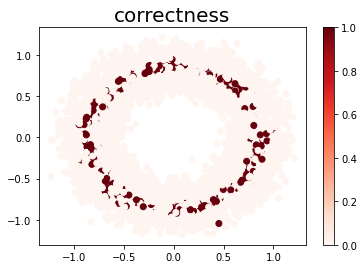

Epoch 00135: early stopping                           
Best validation loss of epoch:                        
0.18385638296604156                                   
Epoch 00064: early stopping                                                      
Best validation loss of epoch:                                                   
0.2967161238193512                                                               
Epoch 00245: early stopping                                                      
Best validation loss of epoch:                                                   
0.29474538564682007                                                              
Epoch 00278: early stopping                                                      
Best validation loss of epoch:                                                   
0.18085023760795593                                                              
Epoch 00308: early stopping                                                      
Best validation

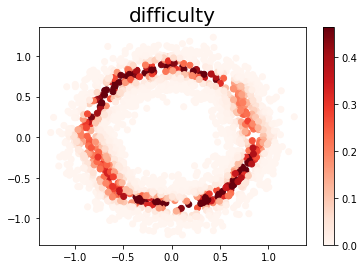

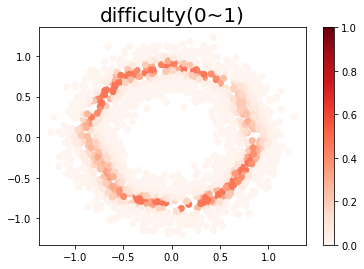

time per fold: 0:02:42.131612 second




fold: [1, 2, 3, 4, 0]
1    1603
0    1597
Name: label, dtype: int64
Epoch 00108: early stopping                          
Best validation loss of epoch:                       
0.15777646005153656                                  
Epoch 00156: early stopping                                                     
Best validation loss of epoch:                                                  
0.17208561301231384                                                             
Epoch 00089: early stopping                                                     
Best validation loss of epoch:                                                  
0.1627865880727768                                                              
Epoch 00097: early stopping                                                     
Best validation loss of epoch:                                                  
0.16715899109840393                                                             


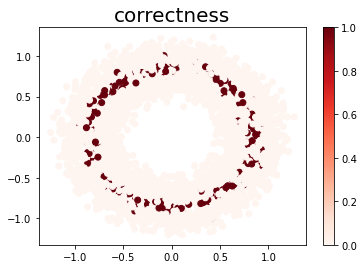

Epoch 00109: early stopping                           
Best validation loss of epoch:                        
0.25270897150039673                                   
Epoch 00153: early stopping                                                      
Best validation loss of epoch:                                                   
0.2489989548921585                                                               
Epoch 00096: early stopping                                                      
Best validation loss of epoch:                                                  
0.1828136295080185                                                              
Epoch 00081: early stopping                                                     
Best validation loss of epoch:                                                  
0.25309979915618896                                                             
Epoch 00153: early stopping                                                     
Best validation loss 

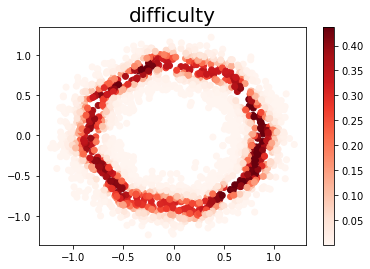

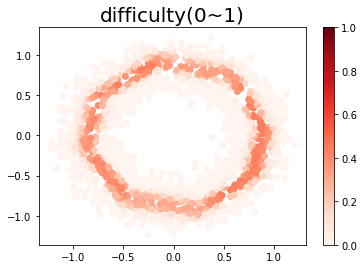

time per fold: 0:02:18.421347 second




fold: [2, 3, 4, 0, 1]
1    1620
0    1580
Name: label, dtype: int64
Epoch 00078: early stopping                          
Best validation loss of epoch:                       
0.21011757850646973                                  
Epoch 00085: early stopping                                                     
Best validation loss of epoch:                                                  
0.17809905111789703                                                             
Epoch 00141: early stopping                                                     
Best validation loss of epoch:                                                  
0.6913213133811951                                                              
Epoch 00159: early stopping                                                     
Best validation loss of epoch:                                                  
0.20294532179832458                                                             


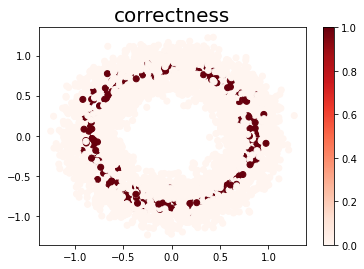

Epoch 00228: early stopping                           
Best validation loss of epoch:                        
0.30005162954330444                                   
Epoch 00064: early stopping                                                      
Best validation loss of epoch:                                                   
0.3084506690502167                                                               
Epoch 00053: early stopping                                                      
Best validation loss of epoch:                                                   
0.30870211124420166                                                              
Epoch 00053: early stopping                                                      
Best validation loss of epoch:                                                   
0.3080138862133026                                                               
Epoch 00052: early stopping                                                      
Best validation

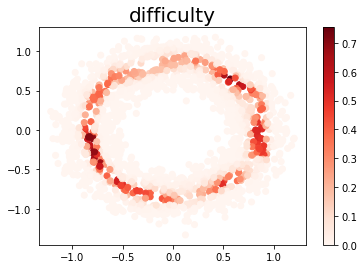

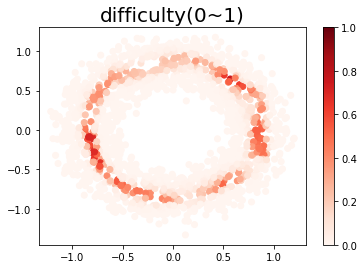

time per fold: 0:02:17.161872 second




fold: [3, 4, 0, 1, 2]
1    1612
0    1588
Name: label, dtype: int64
Epoch 00119: early stopping                          
Best validation loss of epoch:                       
0.16866473853588104                                  
Epoch 00111: early stopping                                                     
Best validation loss of epoch:                                                  
0.16733123362064362                                                             
Epoch 00073: early stopping                                                     
Best validation loss of epoch:                                                  
0.1652844101190567                                                              
Epoch 00077: early stopping                                                     
Best validation loss of epoch:                                                 
0.16938643157482147                                                            
Ep

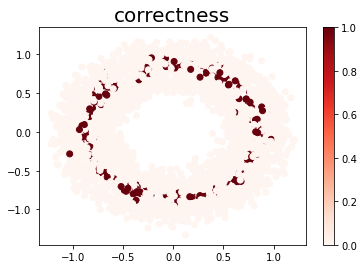

Epoch 00058: early stopping                           
Best validation loss of epoch:                        
0.2415221631526947                                    
Epoch 00211: early stopping                                                     
Best validation loss of epoch:                                                  
0.17825843393802643                                                             
Epoch 00096: early stopping                                                      
Best validation loss of epoch:                                                   
0.23278281092643738                                                              
Epoch 00059: early stopping                                                      
Best validation loss of epoch:                                                   
0.24221108853816986                                                              
Epoch 00137: early stopping                                                      
Best validation lo

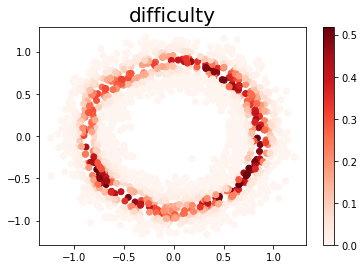

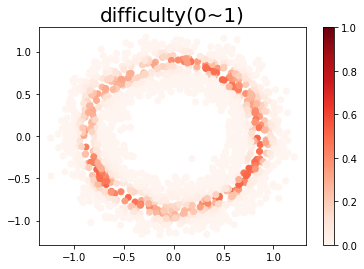

time per fold: 0:02:00.240291 second




fold: [4, 0, 1, 2, 3]
0    1629
1    1571
Name: label, dtype: int64
Epoch 00093: early stopping                          
Best validation loss of epoch:                       
0.1967652589082718                                   
Epoch 00168: early stopping                                                    
Best validation loss of epoch:                                                 
0.19968928396701813                                                            
Epoch 00075: early stopping                                                    
Best validation loss of epoch:                                                 
0.23155410587787628                                                            
Epoch 00064: early stopping                                                    
Best validation loss of epoch:                                                 
0.20284633338451385                                                            
Epoch 000

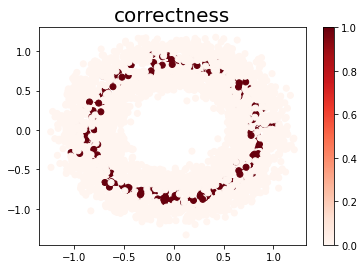

Epoch 00106: early stopping                           
Best validation loss of epoch:                        
0.23660296201705933                                   
Epoch 00290: early stopping                                                      
Best validation loss of epoch:                                                   
0.18403752148151398                                                              
Epoch 00156: early stopping                                                      
Best validation loss of epoch:                                                   
0.1585419923067093                                                               
Epoch 00096: early stopping                                                      
Best validation loss of epoch:                                                  
0.23660336434841156                                                             
Epoch 00160: early stopping                                                     
Best validation lo

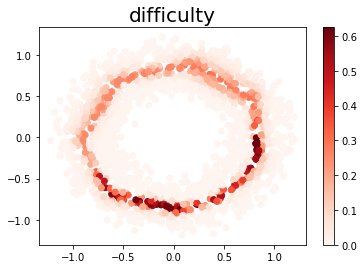

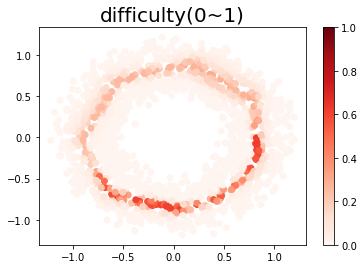

time per fold: 0:01:56.709762 second
Overall time per fold: 0:11:14.667535 second


In [ ]:
Final_data_save = []
Final_difficulty_save = []
sum_number_incorrect = []

overall_start_time = datetime.now()
for i in range(len(fold_order)):
  start_time = datetime.now()
  folds = fold_order[i]
  print('\n\n\n\nfold:',folds)
  difficulty_data_for_model_B,difficulty = CDdm(two_cs_X,two_cs_y,folds)
  Final_data_save.append(difficulty_data_for_model_B)
  Final_difficulty_save.append(difficulty)
  end_time = datetime.now()
  print("time per fold:",end_time - start_time,'second')

overall_end_time = datetime.now()
print("Overall time per fold:",overall_end_time - overall_start_time,'second')

In [ ]:
print(sum_number_incorrect)
print(sum(sum_number_incorrect))

[254, 241, 264, 230, 216]
1205


In [ ]:
dataframe_temp = Final_data_save
for i in range(len(fold_order)):
    dataframe_temp[i]['difficulty'] = Final_difficulty_save[i]

In [ ]:
temp_df= pd.DataFrame(np.row_stack([dataframe_temp[0], dataframe_temp[1], dataframe_temp[2], dataframe_temp[3], dataframe_temp[4]]),
                               columns=['x1', 'x2', 'label','difficulty'])

In [ ]:
writer = pd.ExcelWriter(file_name)
temp_df.to_excel(writer,header=True,index=False)
writer.save()

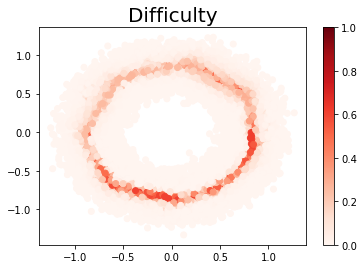

In [ ]:
# Case difficulty visualization
plot = plt.scatter(temp_df['x1'], temp_df['x2'], c=temp_df['difficulty'],cmap='Reds', vmin=0, vmax=1)
plt.colorbar(plot)
plt.title("Difficulty",fontsize=20)
plt.show()